# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Linus Schütte

Datum: 16.11.2023


Gruppe: 88

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

**Lässt sich das Newtonische Abkühlungsgesetz bestätigen und kann man anhand der Messungsdaten den Transportkoeffizienten bestimmen?**

## Versuchsaufbau und Durchführung

Sensor 1 wird in ein Gefäss mit heissem Wasser eingetaucht und der 2 Sensor befindet sich an der Luft und misst die Umbgebungstemperatur.


<img src="figures/Newton.jpg" width="800">

## Versuchsauswertung

In [4]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib
import h5py

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [9]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

path_capacity = "/home/pi/calorimetry_home/experiment_newton/20231116_calorimetry_88_Linus Schuette.h5"


# DONE #

In [10]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

with h5py.File(path_capacity, 'r') as f:
    capacity_data = f["RawData"]
    dataset_capacity = {}

    for uuid_key in capacity_data.keys():
        uuid_group = capacity_data[uuid_key]

        # get Attributes
        attributes = dict(uuid_group.attrs)

        # get data
        temp_data = uuid_group['temperature'][:]
        time_data = uuid_group['timestamp'][:]

        # store attributes and data in dict
        dataset_capacity[uuid_key] = {
            'attributes': attributes,
            'temperature': temp_data,
            'timestamp': time_data
        }
# DONE #

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

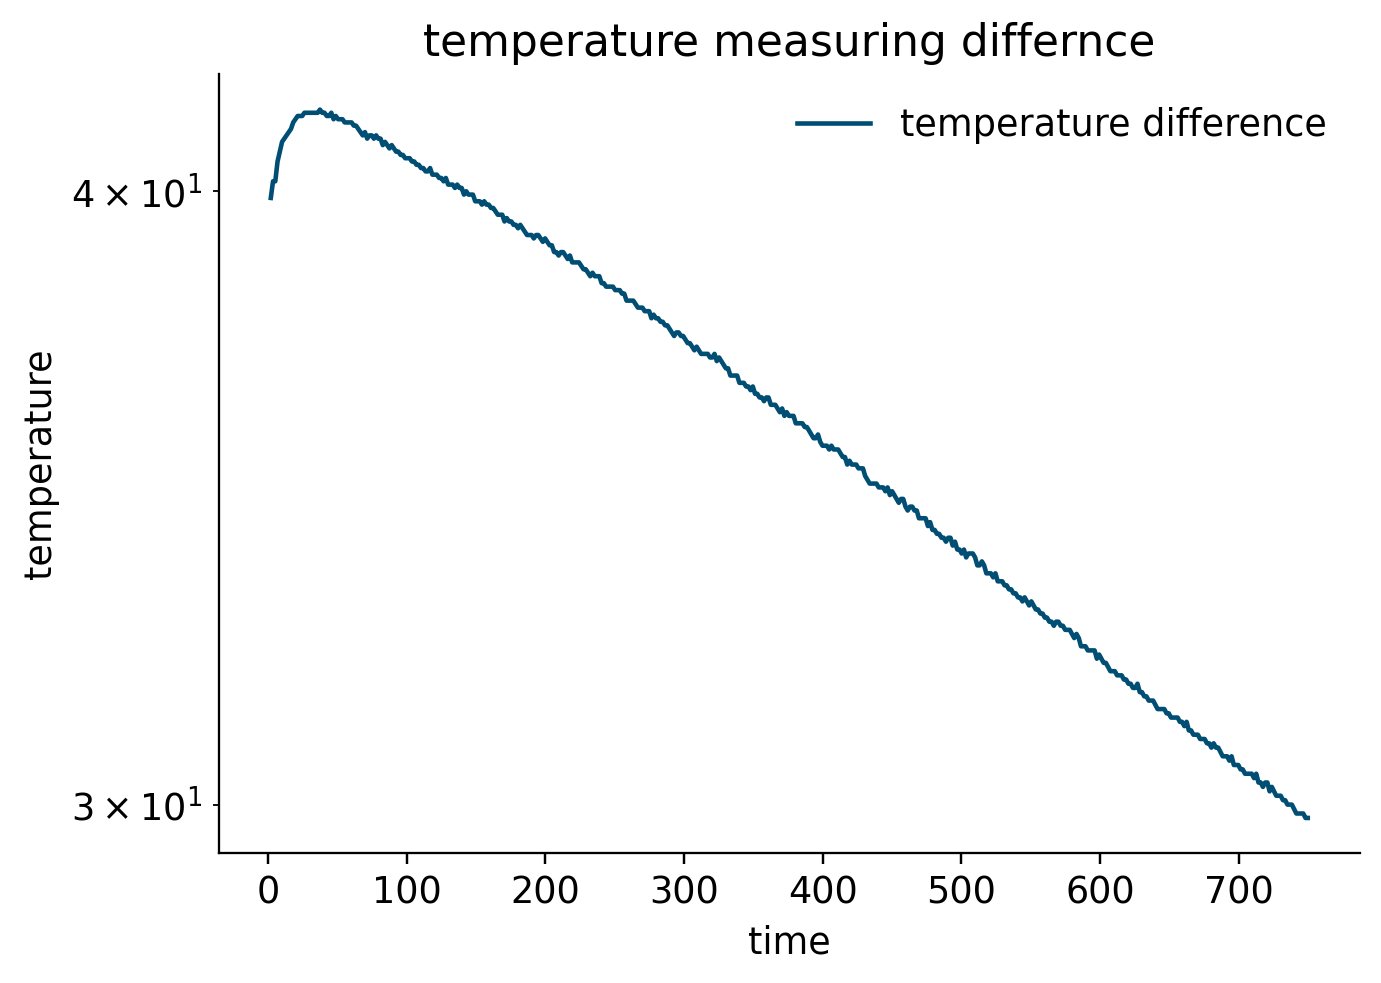

In [13]:
# TODO: Use the temperature and time data for plotting

# load data from uuid 1
uuid1_data = dataset_capacity['1ee7c938-9fb6-66f2-8838-b5a5e2b2cca4']
time_data_1 = uuid1_data['timestamp']
temperature_data_1 = uuid1_data['temperature']

#load data from uuid 2
uuid2_data = dataset_capacity['1ee7c939-604d-6fe1-9664-305bc2d59f16']
time_data_2 = uuid2_data['timestamp']
temperature_data_2 = uuid2_data['temperature']

# temp difference
temp_diff = temperature_data_1 - temperature_data_2

# plot
plt.semilogy(time_data_1, temp_diff, label='temperature difference', linewidth = 1.5)


# plot for both uuids
plt.xlabel('time')
plt.ylabel('temperature')
plt.title('temperature measuring differnce')
plt.legend()
plt.show()


# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [14]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz
# define variables

T_1 = temperature_data_1[0]                   
T_2 = temperature_data_2[0]
t = time_data_1
T = temperature_data_1

# Insert function to calculate K

diff = T - T_2
K = np.polyfit(t, np.log(diff), 0)

# DONE #

#### (iV) Ergebnis

In [15]:
# TODO: Print result

print(K)

# DONE #

[3.577737]


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Mit dem wert von 3,57 nimmt der Transportkoeffizient einen plausiblen Wert an. 
Das Newtonsche Abkühlungsgesetz lässt sich auch bestätigen, da der Verlauf des Graphen linear ist. Dies bedeutet, dass der Temperturunterschied zwischen dem Körper und seiner Umgebung direkt proportional zum Wärmeverlust eines Körpers ist. 

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Der Aufwand ist leider meiner Meinung zu hoch